Loading model...


Model loaded successfully.
Training history loaded successfully.
Final Training Accuracy: 93.79%
Final Validation Accuracy: 95.21%
Opening file dialog...
Selected file: C:/Users/krati/Desktop/ml/deep_fusion_disease_diagnosis/data/test/NORMAL/IM-0003-0001.jpeg
Predicting...
Preprocessing image: C:/Users/krati/Desktop/ml/deep_fusion_disease_diagnosis/data/test/NORMAL/IM-0003-0001.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
Prediction: [[0.31829435]]


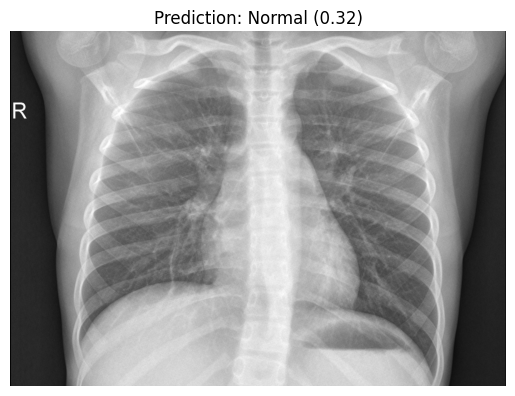

The model predicts: Normal with confidence 0.32


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import json


model_path = 'C:\\Users\\krati\\Desktop\\ml\\deep_fusion_disease_diagnosis\\models\\cnn_model.h5'
history_path = 'C:\\Users\\krati\\Desktop\\ml\\deep_fusion_disease_diagnosis\\notebooks\\training_history.json'


print("Loading model...")
model = load_model(model_path)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model loaded successfully.")


if os.path.exists(history_path):
    with open(history_path, 'r') as f:
        training_history = json.load(f)
    print("Training history loaded successfully.")
    

    final_accuracy = training_history['accuracy'][-1]
    final_val_accuracy = training_history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_accuracy*100:.2f}%")
    print(f"Final Validation Accuracy: {final_val_accuracy*100:.2f}%")
else:
    print("Training history file not found.")


def preprocess_image(image_path, target_size=(64, 64)):
    """
    Preprocesses the input image for prediction.
    :param image_path: Path to the input image
    :param target_size: Desired image size (height, width)
    :return: Preprocessed image ready for prediction
    """
    print(f"Preprocessing image: {image_path}")
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, target_size) 
    img = img.astype('float32') / 255.0 
    img = np.expand_dims(img, axis=0) 
    return img


def predict_xray(image_path, model):
    """
    Predicts and visualizes the result for a single X-ray image.
    :param image_path: Path to the X-ray image
    :param model: Trained model for prediction
    """
    print("Predicting...")
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    print(f"Prediction: {prediction}")

   
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {'Pneumonia' if prediction[0][0] > 0.5 else 'Normal'} ({prediction[0][0]:.2f})")
    plt.axis('off')
    plt.show()

    return prediction

if __name__ == "__main__":
 
    print("Opening file dialog...")
    Tk().withdraw()  
    image_path = askopenfilename(title="Select an X-ray Image", filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    
    if not image_path:
        print("No file selected.")
    else:
        print(f"Selected file: {image_path}")
        prediction = predict_xray(image_path, model)
        print(f"The model predicts: {'Pneumonia' if prediction[0][0] > 0.5 else 'Normal'} with confidence {prediction[0][0]:.2f}")
